### Read Dataset

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('House_price/GiaChungCu_HCM_June2021_laydulieu_com.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31951 entries, 0 to 31950
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GIỐNG - LOẠI        31951 non-null  object 
 1   GIỐNG - NHU CẦU     31951 non-null  object 
 2   GIỐNG - TỈNH THÀNH  31951 non-null  object 
 3   QUẬN HUYỆN          31951 non-null  object 
 4   GIÁ - TRIỆU ĐỒNG    31374 non-null  float64
 5   DIỆN TÍCH - M2      31005 non-null  float64
 6   HƯỚNG               20164 non-null  object 
 7   SỐ TẦNG             0 non-null      float64
 8   SỐ PHÒNG            29566 non-null  float64
 9   SỐ TOILETS          29469 non-null  float64
 10  GIẤY TỜ PHÁP LÝ     17569 non-null  object 
dtypes: float64(5), object(6)
memory usage: 2.7+ MB


In [3]:
df['GIẤY TỜ PHÁP LÝ'].value_counts()

GIẤY TỜ PHÁP LÝ
Đã có sổ        8724
Đang chờ sổ     8667
Giấy tờ khác     178
Name: count, dtype: int64

In [4]:
df.head(5)

,GIỐNG - LOẠI,GIỐNG - NHU CẦU,GIỐNG - TỈNH THÀNH,QUẬN HUYỆN,GIÁ - TRIỆU ĐỒNG,DIỆN TÍCH - M2,HƯỚNG,SỐ TẦNG,SỐ PHÒNG,SỐ TOILETS,GIẤY TỜ PHÁP LÝ
0,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,2650.0,69.0,NaN,NaN,2.0,2.0,Đã có sổ
1,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận Tân Bình,3970.0,74.1,NaN,NaN,2.0,2.0,Đang chờ sổ
2,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,678.0,46.5,Tây,NaN,1.0,1.0,Đang chờ sổ
3,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận Tân Phú,2870.0,65.0,NaN,NaN,2.0,2.0,NaN
4,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,3000.0,70.0,Đông Bắc,NaN,2.0,2.0,Đã có sổ


In [5]:
df.isnull().sum()

GIỐNG - LOẠI              0
GIỐNG - NHU CẦU           0
GIỐNG - TỈNH THÀNH        0
QUẬN HUYỆN                0
GIÁ - TRIỆU ĐỒNG        577
DIỆN TÍCH - M2          946
HƯỚNG                 11787
SỐ TẦNG               31951
SỐ PHÒNG               2385
SỐ TOILETS             2482
GIẤY TỜ PHÁP LÝ       14382
dtype: int64

In [6]:
Percentage_null = df.isnull().sum()/len(df) * 100
Percentage_null


GIỐNG - LOẠI            0.000000
GIỐNG - NHU CẦU         0.000000
GIỐNG - TỈNH THÀNH      0.000000
QUẬN HUYỆN              0.000000
GIÁ - TRIỆU ĐỒNG        1.805890
DIỆN TÍCH - M2          2.960784
HƯỚNG                  36.890864
SỐ TẦNG               100.000000
SỐ PHÒNG                7.464555
SỐ TOILETS              7.768145
GIẤY TỜ PHÁP LÝ        45.012676
dtype: float64

### Data Cleaning

In [7]:
df.rename(columns={
    'GIỐNG - LOẠI': 'Property Type',
    'GIỐNG - NHU CẦU': 'Transaction Type',
    'GIỐNG - TỈNH THÀNH': 'City',
    'QUẬN HUYỆN': 'District',
    'GIÁ - TRIỆU ĐỒNG': 'Price (Million VND)',
    'DIỆN TÍCH - M2': 'Area (m2)',
    'HƯỚNG': 'Direction',
    'SỐ TẦNG': 'Floors',
    'SỐ PHÒNG': 'Rooms',
    'SỐ TOILETS': 'Toilets',
    'GIẤY TỜ PHÁP LÝ': 'Legal Papers'
}, inplace=True)


In [8]:
df.head(5)

,Property Type,Transaction Type,City,District,Price (Million VND),Area (m2),Direction,Floors,Rooms,Toilets,Legal Papers
0,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,2650.0,69.0,NaN,NaN,2.0,2.0,Đã có sổ
1,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận Tân Bình,3970.0,74.1,NaN,NaN,2.0,2.0,Đang chờ sổ
2,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,678.0,46.5,Tây,NaN,1.0,1.0,Đang chờ sổ
3,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận Tân Phú,2870.0,65.0,NaN,NaN,2.0,2.0,NaN
4,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,3000.0,70.0,Đông Bắc,NaN,2.0,2.0,Đã có sổ


In [9]:
df['ID'] = range(1, len(df) + 1)

In [10]:
df.head(5)

,Property Type,Transaction Type,City,District,Price (Million VND),Area (m2),Direction,Floors,Rooms,Toilets,Legal Papers,ID
0,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,2650.0,69.0,NaN,NaN,2.0,2.0,Đã có sổ,1
1,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận Tân Bình,3970.0,74.1,NaN,NaN,2.0,2.0,Đang chờ sổ,2
2,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,678.0,46.5,Tây,NaN,1.0,1.0,Đang chờ sổ,3
3,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận Tân Phú,2870.0,65.0,NaN,NaN,2.0,2.0,NaN,4
4,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,3000.0,70.0,Đông Bắc,NaN,2.0,2.0,Đã có sổ,5


In [11]:
df['Price (Million VND)'].value_counts()

Price (Million VND)
2100.0     44
2200.0     42
2300.0     41
2500.0     36
2000.0     35
           ..
4207.0      1
11947.7     1
6245.7      1
9380.1      1
12915.4     1
Name: count, Length: 26337, dtype: int64

In [12]:
df = df[(df['Price (Million VND)'] >= 1300.0) & (df['Price (Million VND)'] < 21000.0)]


In [13]:
df['Price (Million VND)'].value_counts()

Price (Million VND)
2100.0    44
2200.0    42
2300.0    41
2500.0    36
2000.0    35
          ..
6293.0     1
6559.2     1
5056.1     1
9238.3     1
2129.3     1
Name: count, Length: 26222, dtype: int64

In [14]:
# Calculate the quantiles -- Tính Q1 và Q3
q1 = df['Price (Million VND)'].quantile(0.25) # Tính Q1
q3 = df['Price (Million VND)'].quantile(0.75) # Tính Q3

# Calculate the interquantile range
iqr = q3 - q1

# Calculate the whisker
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

In [15]:
print(upper, lower)

16734.9 -2335.500000000001


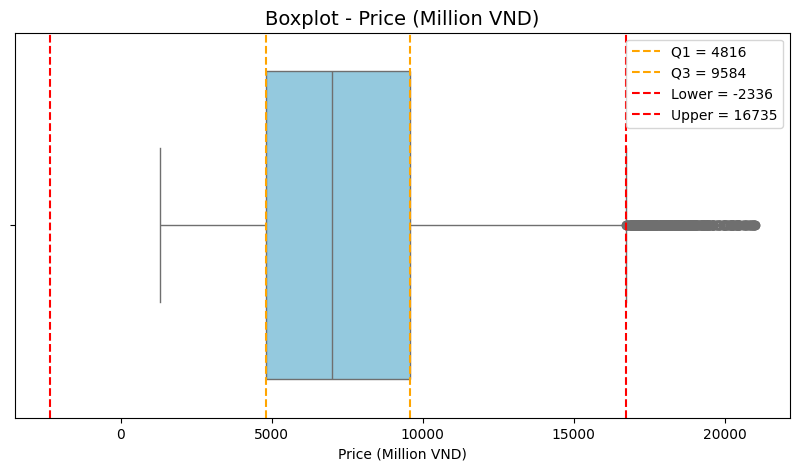

In [16]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Price (Million VND)'], color='skyblue')

# Vẽ các đường tham chiếu Q1, Q3, upper, lower
plt.axvline(q1, color='orange', linestyle='--', label=f'Q1 = {q1:.0f}')
plt.axvline(q3, color='orange', linestyle='--', label=f'Q3 = {q3:.0f}')
plt.axvline(lower, color='red', linestyle='--', label=f'Lower = {lower:.0f}')
plt.axvline(upper, color='red', linestyle='--', label=f'Upper = {upper:.0f}')

plt.title('Boxplot - Price (Million VND)', fontsize=14)
plt.xlabel('Price (Million VND)')
plt.legend()
plt.show()


In [17]:
df['Price (Million VND)'].fillna(df['Price (Million VND)'].median(), inplace=True)

C:\Users\ADmin\AppData\Local\Temp\ipykernel_24616\2096081638.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price (Million VND)'].fillna(df['Price (Million VND)'].median(), inplace=True)


In [18]:
print(df['Price (Million VND)'].isnull().sum())

0


In [19]:
# df['Price (Million VND)'].max()
df['Price (Million VND)'].min()


np.float64(1300.0)

In [20]:
df.isnull().sum()

Property Type              0
Transaction Type           0
City                       0
District                   0
Price (Million VND)        0
Area (m2)                931
Direction              11466
Floors                 31155
Rooms                   2328
Toilets                 2419
Legal Papers           14075
ID                         0
dtype: int64

In [21]:
df['Area (m2)'].fillna(df['Area (m2)'].median(), inplace=True)

C:\Users\ADmin\AppData\Local\Temp\ipykernel_24616\85523567.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Area (m2)'].fillna(df['Area (m2)'].median(), inplace=True)


In [22]:
df['Rooms'].fillna(df['Rooms'].mode()[0], inplace=True)

C:\Users\ADmin\AppData\Local\Temp\ipykernel_24616\1653612732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rooms'].fillna(df['Rooms'].mode()[0], inplace=True)


In [23]:
df['Rooms'].value_counts()

Rooms
2.0    12609
3.0     8679
1.0     6002
4.0     3855
5.0        7
7.0        2
6.0        1
Name: count, dtype: int64

In [24]:
df.drop(df[(df['Rooms'] == 7) & (df['Area (m2)'] == 68.0)].index, inplace=True)

In [25]:
df[(df['Rooms'] == 7) & (df['Area (m2)'] == 68.0)]

,Property Type,Transaction Type,City,District,Price (Million VND),Area (m2),Direction,Floors,Rooms,Toilets,Legal Papers,ID


In [26]:
df['Rooms'].value_counts()


Rooms
2.0    12609
3.0     8679
1.0     6002
4.0     3855
5.0        7
6.0        1
7.0        1
Name: count, dtype: int64

In [27]:
df[df['Rooms'] == 6]

,Property Type,Transaction Type,City,District,Price (Million VND),Area (m2),Direction,Floors,Rooms,Toilets,Legal Papers,ID
138,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Huyện Nhà Bè,4400.0,236.0,NaN,NaN,6.0,4.0,Đã có sổ,139


In [28]:
df.isnull().sum()

Property Type              0
Transaction Type           0
City                       0
District                   0
Price (Million VND)        0
Area (m2)                  0
Direction              11466
Floors                 31154
Rooms                      0
Toilets                 2419
Legal Papers           14075
ID                         0
dtype: int64

In [29]:
df.drop(columns=['Floors'], inplace=True)

In [30]:
df.isnull().sum() 


Property Type              0
Transaction Type           0
City                       0
District                   0
Price (Million VND)        0
Area (m2)                  0
Direction              11466
Rooms                      0
Toilets                 2419
Legal Papers           14075
ID                         0
dtype: int64

In [31]:
df['Toilets'] = df['Toilets'].fillna((df['Rooms'] // 2).fillna(1))



In [32]:
df['Toilets'].value_counts()

Toilets
1.0    17009
2.0     9782
3.0     3868
0.0      478
4.0       12
5.0        4
6.0        1
Name: count, dtype: int64

In [33]:
df['Toilets'] = df['Toilets'].replace(0, 1)

In [34]:
df['Toilets'].value_counts()

Toilets
1.0    17487
2.0     9782
3.0     3868
4.0       12
5.0        4
6.0        1
Name: count, dtype: int64

In [35]:
df.isnull().sum()

Property Type              0
Transaction Type           0
City                       0
District                   0
Price (Million VND)        0
Area (m2)                  0
Direction              11466
Rooms                      0
Toilets                    0
Legal Papers           14075
ID                         0
dtype: int64

In [36]:
df['Direction'] = df['Direction'].fillna('Null')
df['Legal Papers'] = df['Legal Papers'].fillna('Chưa có giấy tờ')  
df.loc[df['Legal Papers'] == 'Giấy tờ khác', 'Legal Papers'] = 'Chưa có giấy tờ'



In [37]:
df['Legal Papers'].value_counts()

Legal Papers
Chưa có giấy tờ    14220
Đã có sổ            8479
Đang chờ sổ         8455
Name: count, dtype: int64

In [38]:
df.groupby('Legal Papers')['Price (Million VND)'].mean()

Legal Papers
Chưa có giấy tờ    7532.119262
Đang chờ sổ        7402.308688
Đã có sổ           7339.707562
Name: Price (Million VND), dtype: float64

In [39]:
df['Transaction Type'].value_counts()

Transaction Type
Cần bán     30445
Cần thuê      709
Name: count, dtype: int64

In [40]:

df.loc[df['Transaction Type'] == 'Cần thuê', 'Transaction Type'] = 'Cần bán'

In [41]:
df['Transaction Type'].value_counts()

Transaction Type
Cần bán    31154
Name: count, dtype: int64

In [42]:
df.isnull().sum()

Property Type          0
Transaction Type       0
City                   0
District               0
Price (Million VND)    0
Area (m2)              0
Direction              0
Rooms                  0
Toilets                0
Legal Papers           0
ID                     0
dtype: int64

# SAVING DATA

In [43]:
# saving the dataframe
df.to_csv(r'Complete_dataset/HCM_house_price.csv')

# Machine Learning

## Plan : 

- LinearRegression → baseline, dễ hiểu, giải thích được.
- HistGradientBoostingRegressor (HGBR) → phiên bản tối ưu hơn GradientBoosting trong sklearn, chạy nhanh và hiệu quả trên dữ liệu lớn.
- LGBMRegressor → mạnh mẽ, thường outperform HGBR trong nhiều bài toán tabular.
- ====================================
- Linear Regression, Ridge (baseline hồi quy)
- Random Forest, GradientBoosting, LGBM, HistGradientBoosting (cây mạnh)
- MLPRegressor hoặc SVR (đại diện nhóm khác)

Ý nghĩa các cột trong bảng:

Model: Tên thuật toán.

Adjusted R-Squared, R-Squared: Độ đo chất lượng fit (càng cao càng tốt, gần 1).

RMSE: Sai số trung bình căn bậc 2 (càng thấp càng tốt).

Time Taken: Thời gian huấn luyện (giây).

In [44]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from lazypredict.Supervised import LazyRegressor

df = pd.read_csv('Complete_dataset/HCM_house_price.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31154 entries, 0 to 31153
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           31154 non-null  int64  
 1   Property Type        31154 non-null  object 
 2   Transaction Type     31154 non-null  object 
 3   City                 31154 non-null  object 
 4   District             31154 non-null  object 
 5   Price (Million VND)  31154 non-null  float64
 6   Area (m2)            31154 non-null  float64
 7   Direction            31154 non-null  object 
 8   Rooms                31154 non-null  float64
 9   Toilets              31154 non-null  float64
 10  Legal Papers         31154 non-null  object 
 11  ID                   31154 non-null  int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


In [46]:
numeric_features = ['Area (m2)', 'Rooms', 'Toilets']
categorical_features = ['Transaction Type', 'City', 'District', 'Direction', 'Legal Papers']

feature_columns = numeric_features + categorical_features

In [47]:
X = df[feature_columns]
y = df['Price (Million VND)']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

preprocessor.fit(X_train)


,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [50]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [51]:
feature_names = preprocessor.get_feature_names_out()

In [52]:
from lazypredict.Supervised import LazyRegressor 
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor


custom_classes = [
    LinearRegression,
    Ridge, 
    Lasso, 
    DecisionTreeRegressor, 
    RandomForestRegressor, 
    HistGradientBoostingRegressor,
    LGBMRegressor,
    # GradientBoostingRegressor,

]

# Thử truyền danh sách các lớp này
reg = LazyRegressor(regressors=custom_classes, ignore_warnings=False) 
models, predictions = reg.fit(X_train_processed, X_test_processed, y_train, y_test)

  0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 24923, number of used features: 35
[LightGBM] [Info] Start training from score 7454.286303


In [53]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.75,0.76,1709.67,0.21
HistGradientBoostingRegressor,0.75,0.75,1713.90,3.21
RandomForestRegressor,0.72,0.72,1822.83,9.93
LinearRegression,0.65,0.66,2028.39,0.11
Ridge,0.65,0.66,2028.40,0.08
Lasso,0.65,0.66,2028.55,2.82
DecisionTreeRegressor,0.52,0.53,2383.94,0.18


In [54]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.75,0.76,1709.67,0.21
HistGradientBoostingRegressor,0.75,0.75,1713.90,3.21
RandomForestRegressor,0.72,0.72,1822.83,9.93
LinearRegression,0.65,0.66,2028.39,0.11
Ridge,0.65,0.66,2028.40,0.08
Lasso,0.65,0.66,2028.55,2.82
DecisionTreeRegressor,0.52,0.53,2383.94,0.18


In [55]:
# ĐOẠN 1 — DEFINE MODELS
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

models = {
    'LinearRegression': (LinearRegression(), {}),  # vẫn để trống params
    'Ridge': (Ridge(), {'alpha': [0.1, 1, 10, 100]}),
    'Lasso': (Lasso(), {'alpha': [0.001, 0.01, 0.1, 1, 10]}),
    'DecisionTreeRegressor': (DecisionTreeRegressor(), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    'RandomForestRegressor': (RandomForestRegressor(), {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }),
    'HistGradientBoostingRegressor': (HistGradientBoostingRegressor(), {
        'max_iter': [100, 200],
        'max_depth': [None, 10, 20],
        'learning_rate': [0.05, 0.1, 0.2]
    }),
    # 'GradientBoostingRegressor': (GradientBoostingRegressor(), {
    #     'n_estimators': [100, 200],
    #     'max_depth': [3, 5, 7],
    #     'learning_rate': [0.05, 0.1, 0.2]
    # })
}

# try:
#     from xgboost import XGBRegressor
#     models['XGBRegressor'] = (XGBRegressor(), {
#         'n_estimators': [100, 200],
#         'max_depth': [3, 5, 7],
#         'learning_rate': [0.05, 0.1, 0.2]
#     })
# except ImportError:
#     pass

try:
    from lightgbm import LGBMRegressor
    models['LGBMRegressor'] = (LGBMRegressor(), {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.05, 0.1, 0.2]
    })
except ImportError:
    pass


In [56]:
# 8. Train, tune, and evaluate models
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

results = []
predictions_all = {}
cv_results_dict = {}
best_params_dict = {}  
best_model_name = None
best_r2 = -999

# Chuyển dữ liệu sang dense (phòng khi có sparse matrix)
X_train_dense = X_train_processed.toarray() if hasattr(X_train_processed, 'toarray') else X_train_processed
X_test_dense = X_test_processed.toarray() if hasattr(X_test_processed, 'toarray') else X_test_processed

for name, (model, params) in models.items():
    print(f"\n🔹 Training {name}...")

    # --- (A) Hyperparameter tuning nếu có param grid ---
    if params and len(params) > 0:
        search = GridSearchCV(
            model,
            param_grid=params,
            cv=3,
            scoring='neg_root_mean_squared_error',
            n_jobs=-1
        )
        search.fit(X_train_dense, y_train)
        best_model = search.best_estimator_
        best_params_dict[name] = search.best_params_             
        cv_results_dict[name] = search.cv_results_
        print(f"   ✅ Best Params: {search.best_params_}")

    # --- (B) Nếu không có params: chạy cross_val_score ---
    else:
        scores = cross_val_score(model, X_train_dense, y_train, cv=3, scoring='r2')
        print(f"   Mean CV R²: {scores.mean():.3f} ± {scores.std():.3f}")
        best_model = model.fit(X_train_dense, y_train)
        best_params_dict[name] = {}                              # ✅ lưu dict rỗng
        cv_results_dict[name] = {'mean_r2': scores.mean(), 'std_r2': scores.std()}

    # --- (C) Đánh giá trên tập test ---
    y_pred = best_model.predict(X_test_dense)
    y_true = y_test.values if hasattr(y_test, "values") else y_test
    predictions_all[name] = (y_true, y_pred)

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    results.append({'Model': name, 'MAE': mae, 'RMSE': rmse, 'R2': r2})
    print(f"   Test R²: {r2:.3f}, RMSE: {rmse:.3f}")

    # --- (D) Cập nhật best model ---
    if r2 > best_r2:
        best_r2 = r2
        best_model_name = name

print("\n🏆 Best model overall:", best_model_name, f"(R² = {best_r2:.3f})")



🔹 Training LinearRegression...
   Mean CV R²: 0.635 ± 0.022
   Test R²: 0.657, RMSE: 2028.388

🔹 Training Ridge...
   ✅ Best Params: {'alpha': 1}
   Test R²: 0.657, RMSE: 2028.292

🔹 Training Lasso...
   ✅ Best Params: {'alpha': 0.1}
   Test R²: 0.657, RMSE: 2028.357

🔹 Training DecisionTreeRegressor...
   ✅ Best Params: {'max_depth': 10, 'min_samples_split': 10}
   Test R²: 0.729, RMSE: 1801.678

🔹 Training RandomForestRegressor...
   ✅ Best Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
   Test R²: 0.742, RMSE: 1759.455

🔹 Training HistGradientBoostingRegressor...
   ✅ Best Params: {'learning_rate': 0.05, 'max_depth': 20, 'max_iter': 100}
   Test R²: 0.754, RMSE: 1716.431

🔹 Training LGBMRegressor...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 333
[Lig

In [57]:
# 9. Print sorted performance table by lowest RMSE
import pandas as pd
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values('RMSE')
print("\nModel Performance (sorted by RMSE):")
print(results_df_sorted[['Model', 'MAE', 'RMSE', 'R2']].to_string(index=False, float_format='%.2f'))


Model Performance (sorted by RMSE):
                        Model     MAE    RMSE   R2
                LGBMRegressor 1359.95 1709.55 0.76
HistGradientBoostingRegressor 1364.50 1716.43 0.75
        RandomForestRegressor 1374.27 1759.46 0.74
        DecisionTreeRegressor 1404.74 1801.68 0.73
                        Ridge 1579.73 2028.29 0.66
                        Lasso 1579.93 2028.36 0.66
             LinearRegression 1579.98 2028.39 0.66


In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results = []

for name, (y_true, y_pred) in predictions_all.items():
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })


results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by="R2", ascending=False).reset_index(drop=True)

print("🔹 Model Ranking (Higher R2 = Better):")
print(results_df_sorted)

print(f"\n🏆 Best model: {best_model_name}")


🔹 Model Ranking (Higher R2 = Better):
                           Model     MAE    RMSE   R2
0                  LGBMRegressor 1359.95 1709.55 0.76
1  HistGradientBoostingRegressor 1364.50 1716.43 0.75
2          RandomForestRegressor 1374.27 1759.46 0.74
3          DecisionTreeRegressor 1404.74 1801.68 0.73
4                          Ridge 1579.73 2028.29 0.66
5                          Lasso 1579.93 2028.36 0.66
6               LinearRegression 1579.98 2028.39 0.66

🏆 Best model: LGBMRegressor


# Chart

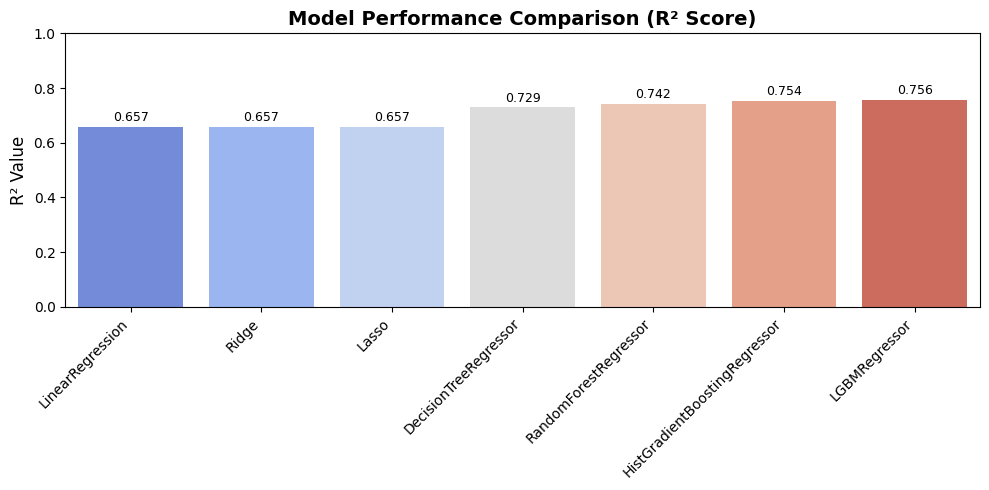

In [59]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=results_df,
    x="Model",
    y="R2",
    palette="coolwarm"   
)
plt.title("Model Performance Comparison (R² Score)", fontsize=14, fontweight="bold")
plt.xlabel("", fontsize=12)
plt.ylabel("R² Value", fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=9, padding=2)

plt.tight_layout()
plt.show()


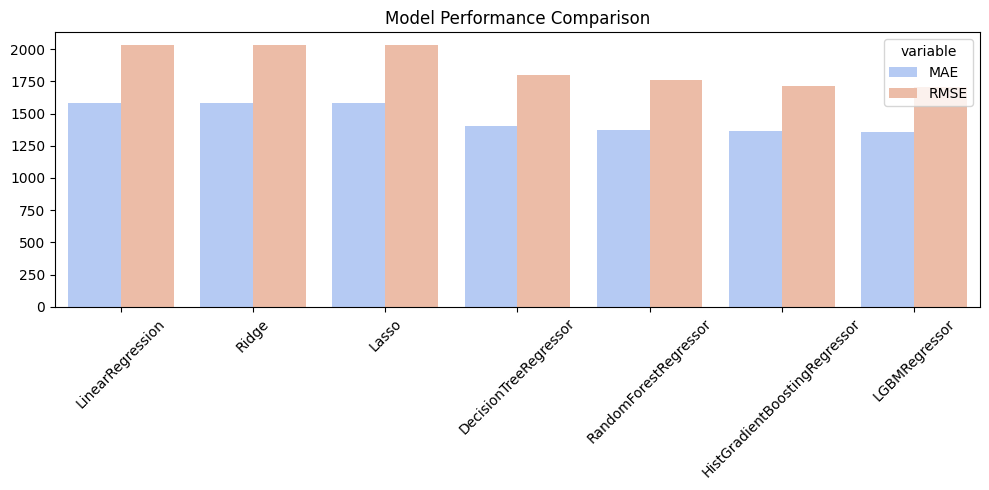

In [60]:
metrics_melted = results_df.melt(id_vars="Model", value_vars=["MAE", "RMSE"])
plt.figure(figsize=(10,5))
sns.barplot(data=metrics_melted, x="Model", y="value", hue="variable", palette="coolwarm")
plt.title("Model Performance Comparison")
plt.xticks(rotation = 45)
plt.xlabel("")
plt.ylabel("")


plt.tight_layout()
plt.show()

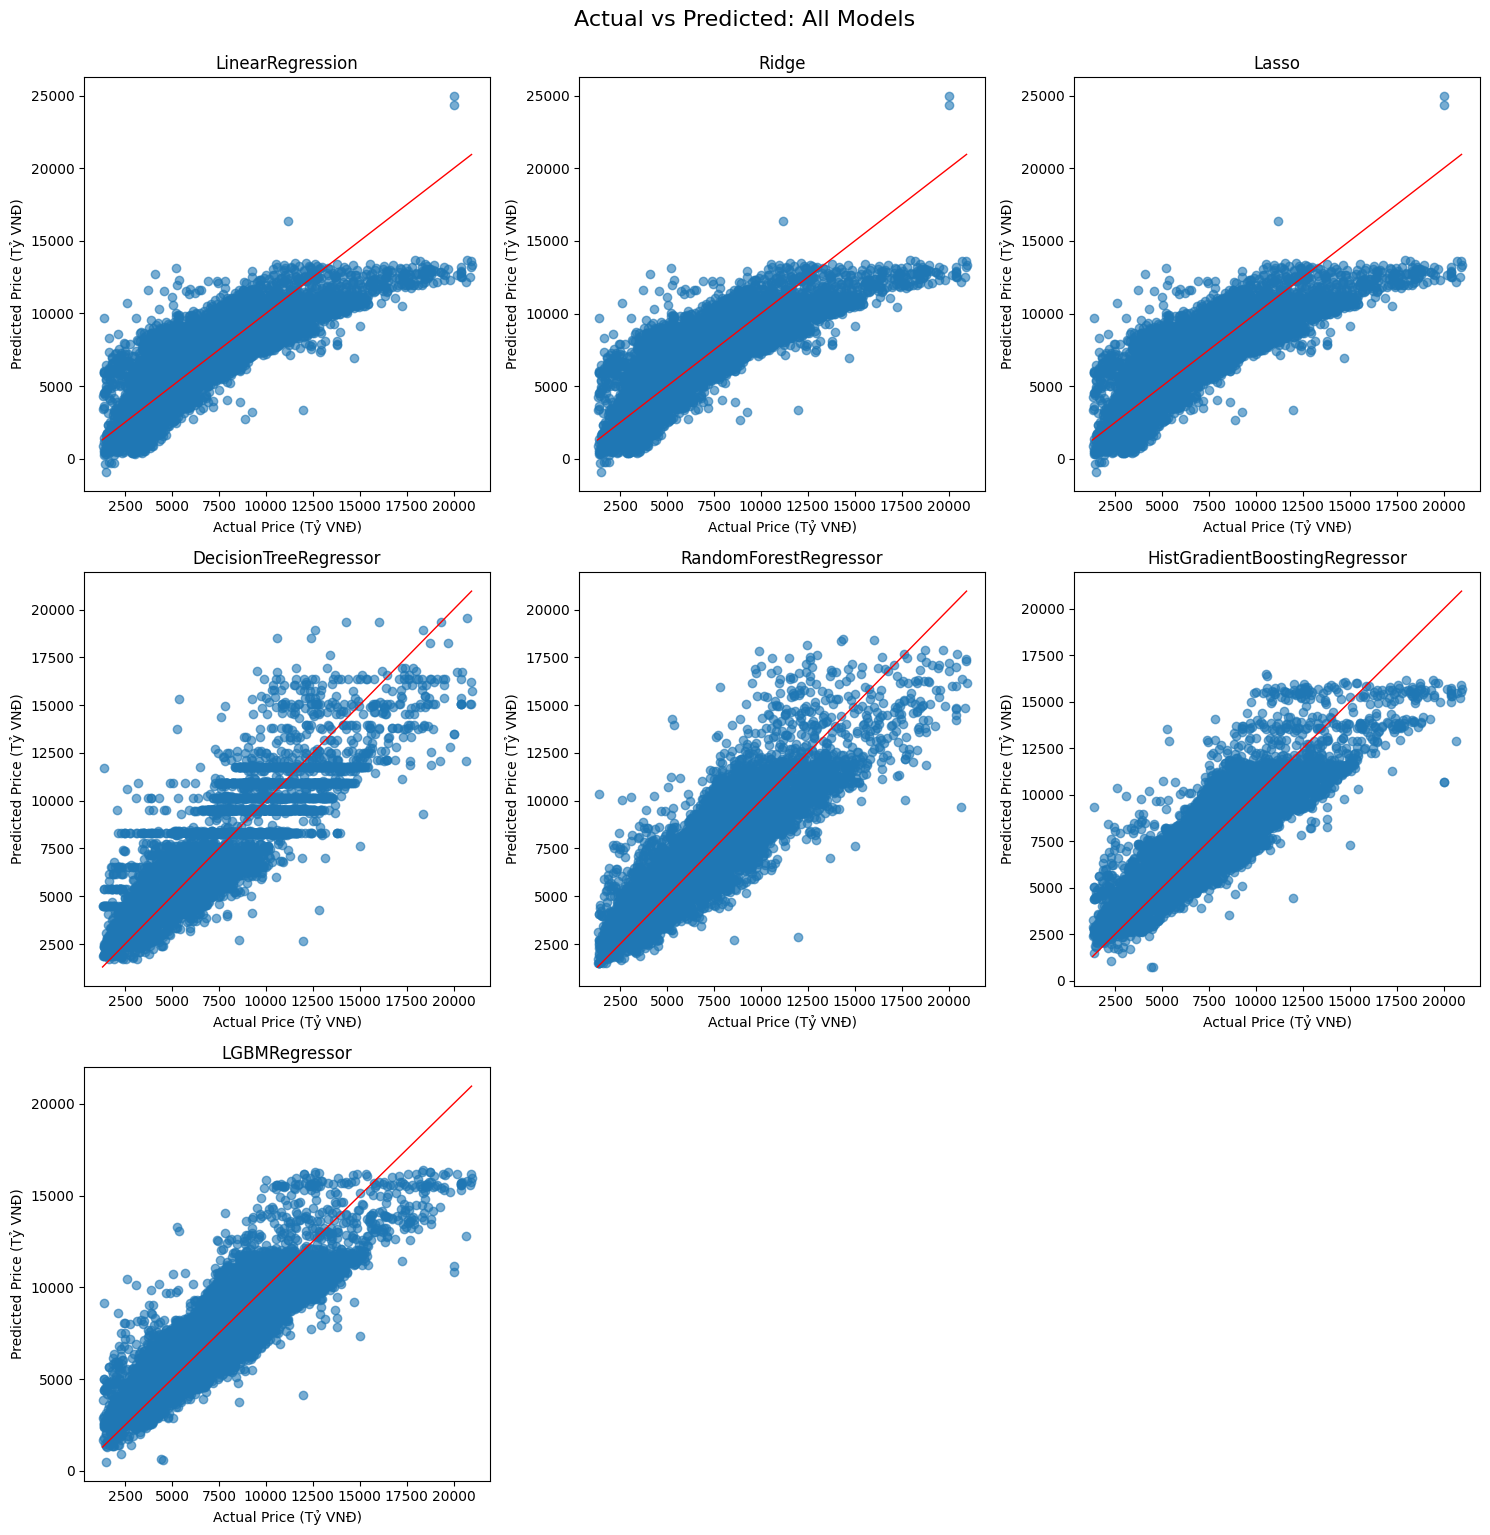

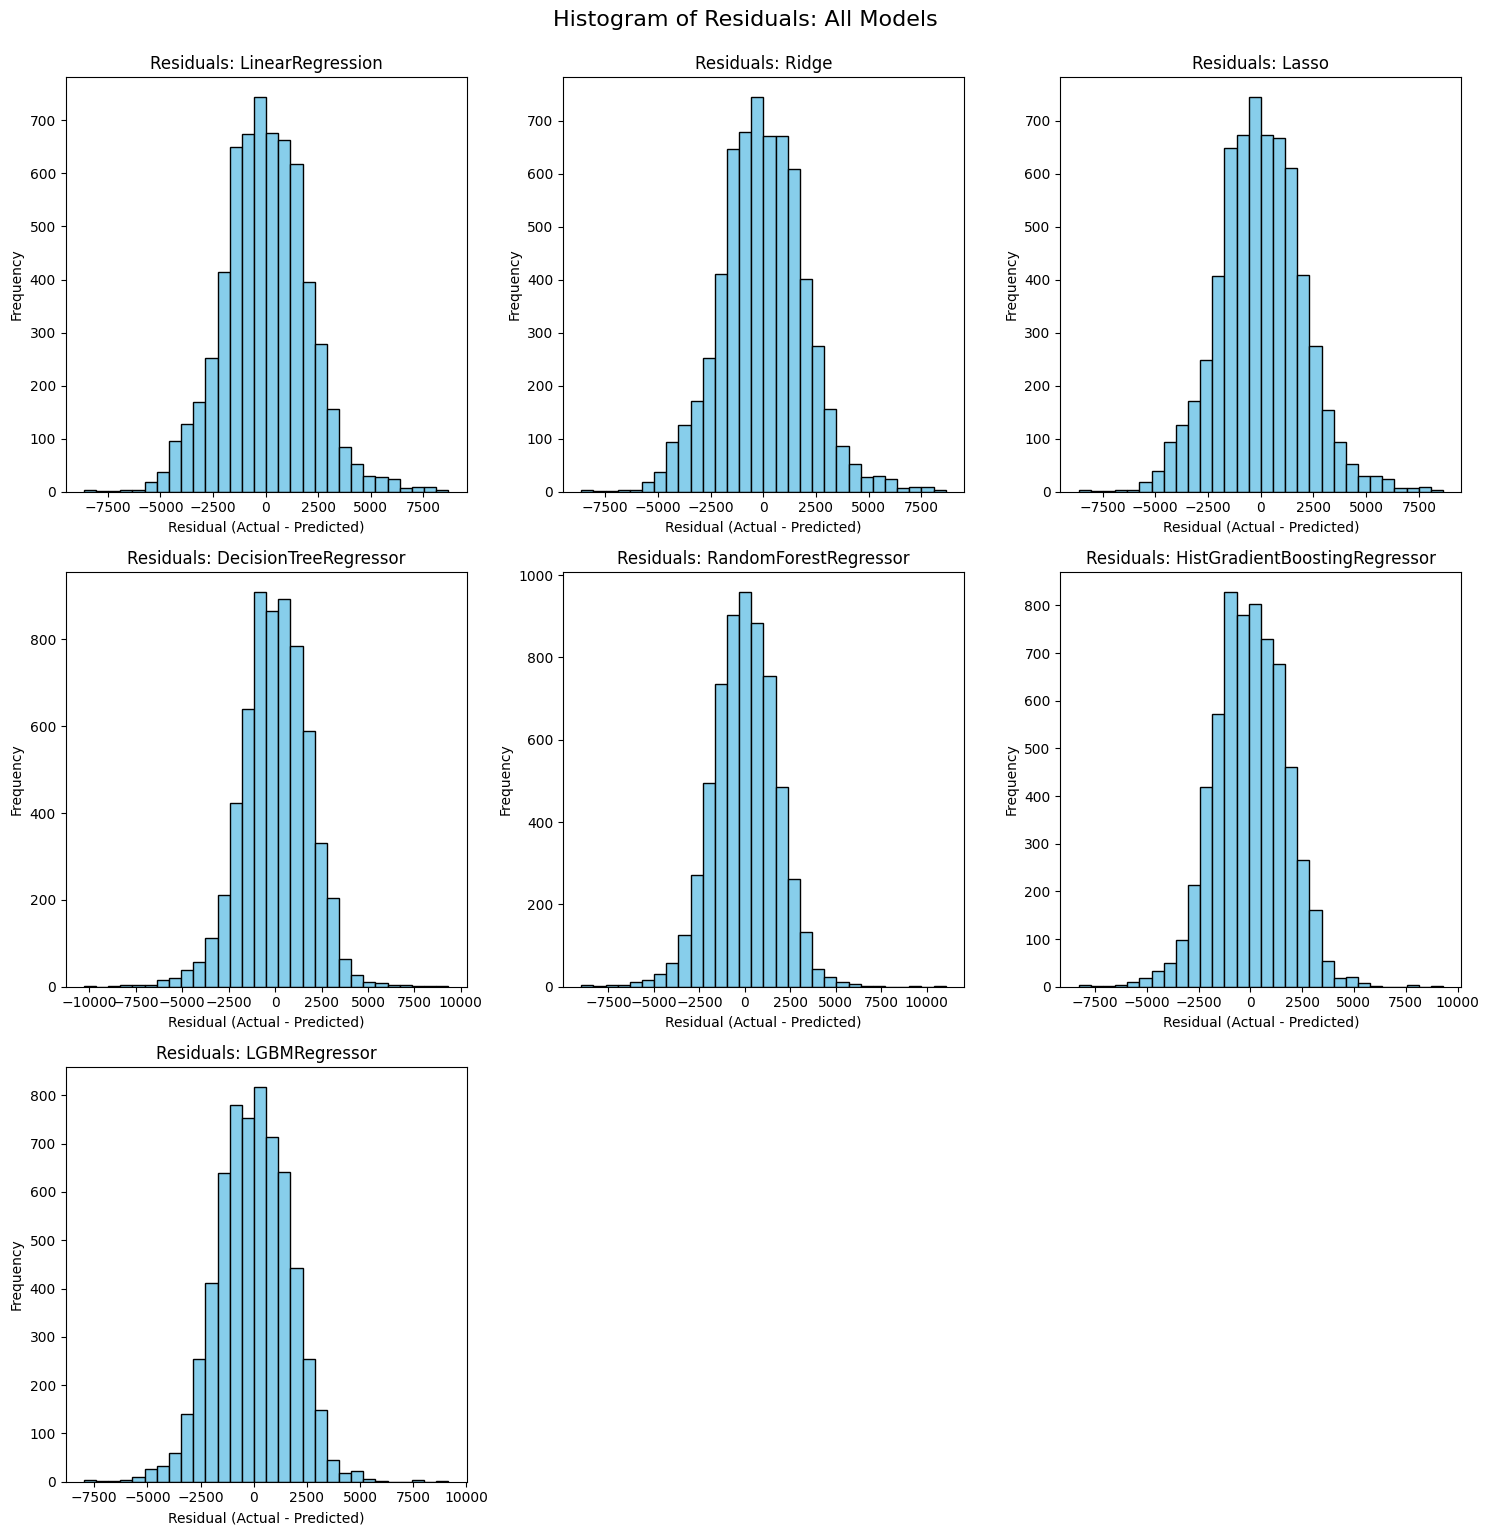

In [61]:

import matplotlib.pyplot as plt
import numpy as np

n_models = len(predictions_all)
cols = 3
rows = int(np.ceil(n_models / cols))

# Actual vs Predicted
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, (name, (y_true, y_pred)) in enumerate(predictions_all.items()):
    ax = axes[i]
    ax.scatter(y_true, y_pred, alpha=0.6)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r-', linewidth=1)
    ax.set_title(f"{name}")
    ax.set_xlabel("Actual Price (Tỷ VNĐ)")
    ax.set_ylabel("Predicted Price (Tỷ VNĐ)")

for ax in axes[len(predictions_all):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.suptitle("Actual vs Predicted: All Models", fontsize=16, y=1.02)
plt.show()


# Histogram Residuals 
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, (name, (y_true, y_pred)) in enumerate(predictions_all.items()):
    residuals = y_true - y_pred
    residuals = residuals[np.isfinite(residuals)]
    ax = axes[i]
    ax.hist(residuals, bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f"Residuals: {name}")
    ax.set_xlabel("Residual (Actual - Predicted)")
    ax.set_ylabel("Frequency")

for ax in axes[len(predictions_all):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.suptitle("Histogram of Residuals: All Models", fontsize=16, y=1.02)
plt.show()


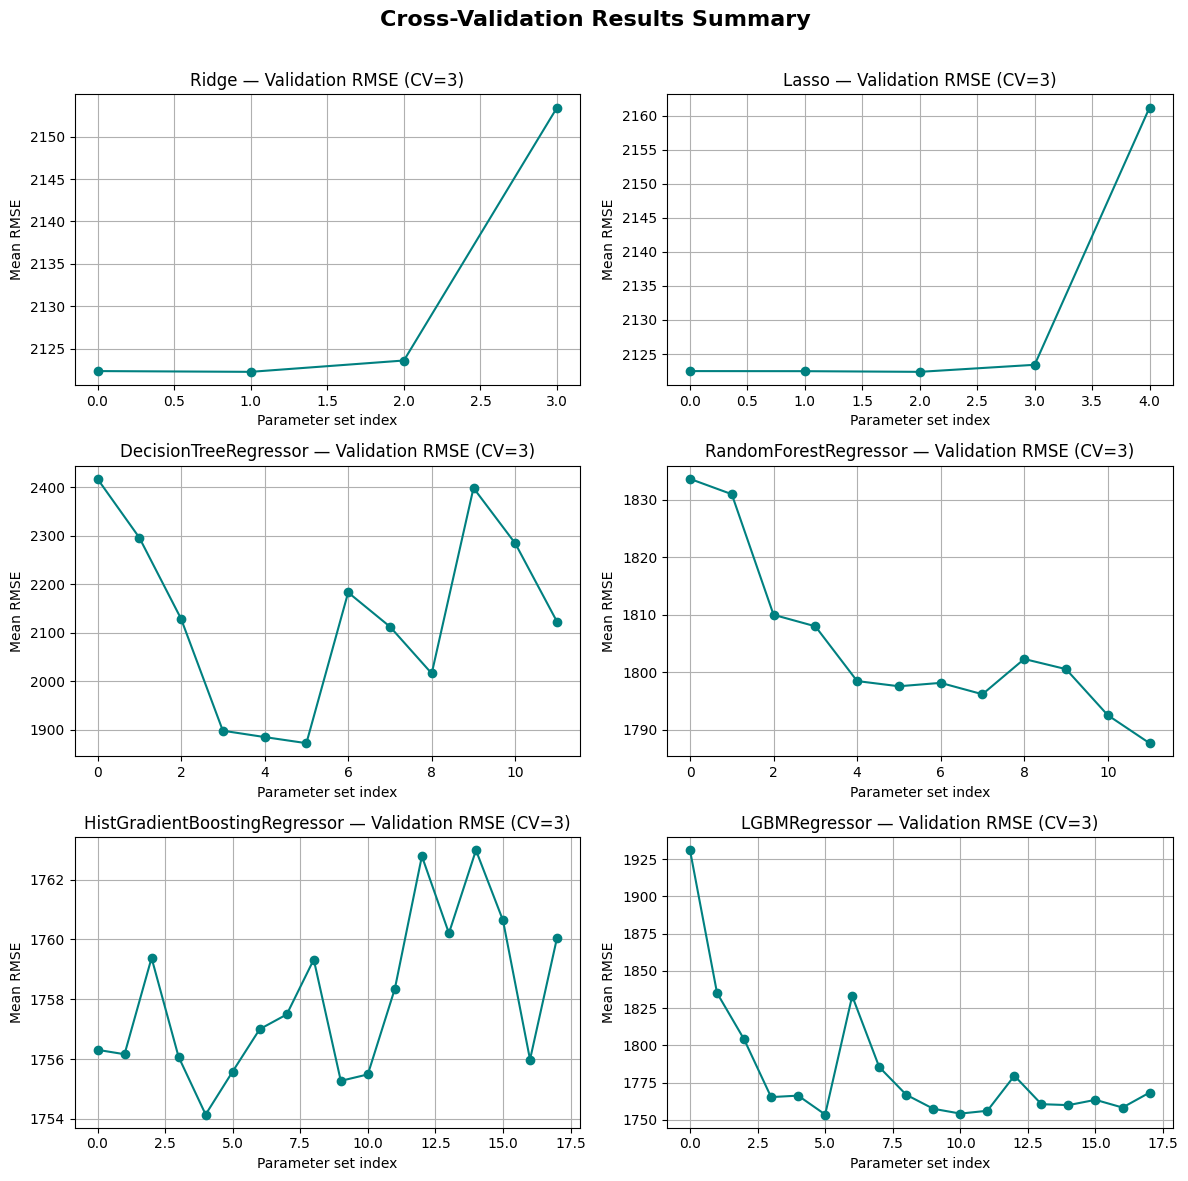

In [62]:
import matplotlib.pyplot as plt
import math

valid_results = {
    name: cv for name, cv in cv_results_dict.items()
    if cv is not None and name.lower() != "linearregression"
}

n_models = len(valid_results)
if n_models > 0:
    n_cols = 2
    n_rows = math.ceil(n_models / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
    axes = axes.flatten()

    for idx, (name, cv_results) in enumerate(valid_results.items()):
        ax = axes[idx]
        mean_test_scores = -cv_results['mean_test_score']
        ax.plot(range(len(mean_test_scores)), mean_test_scores, marker='o', color='teal')
        ax.set_title(f"{name} — Validation RMSE (CV=3)")
        ax.set_xlabel("Parameter set index")
        ax.set_ylabel("Mean RMSE")
        ax.grid(True)

    fig.suptitle("Cross-Validation Results Summary", fontsize=16, fontweight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()



📈 Plotting learning curve for LinearRegression...

📈 Plotting learning curve for Ridge...

📈 Plotting learning curve for Lasso...

📈 Plotting learning curve for DecisionTreeRegressor...

📈 Plotting learning curve for RandomForestRegressor...

📈 Plotting learning curve for HistGradientBoostingRegressor...

📈 Plotting learning curve for LGBMRegressor...


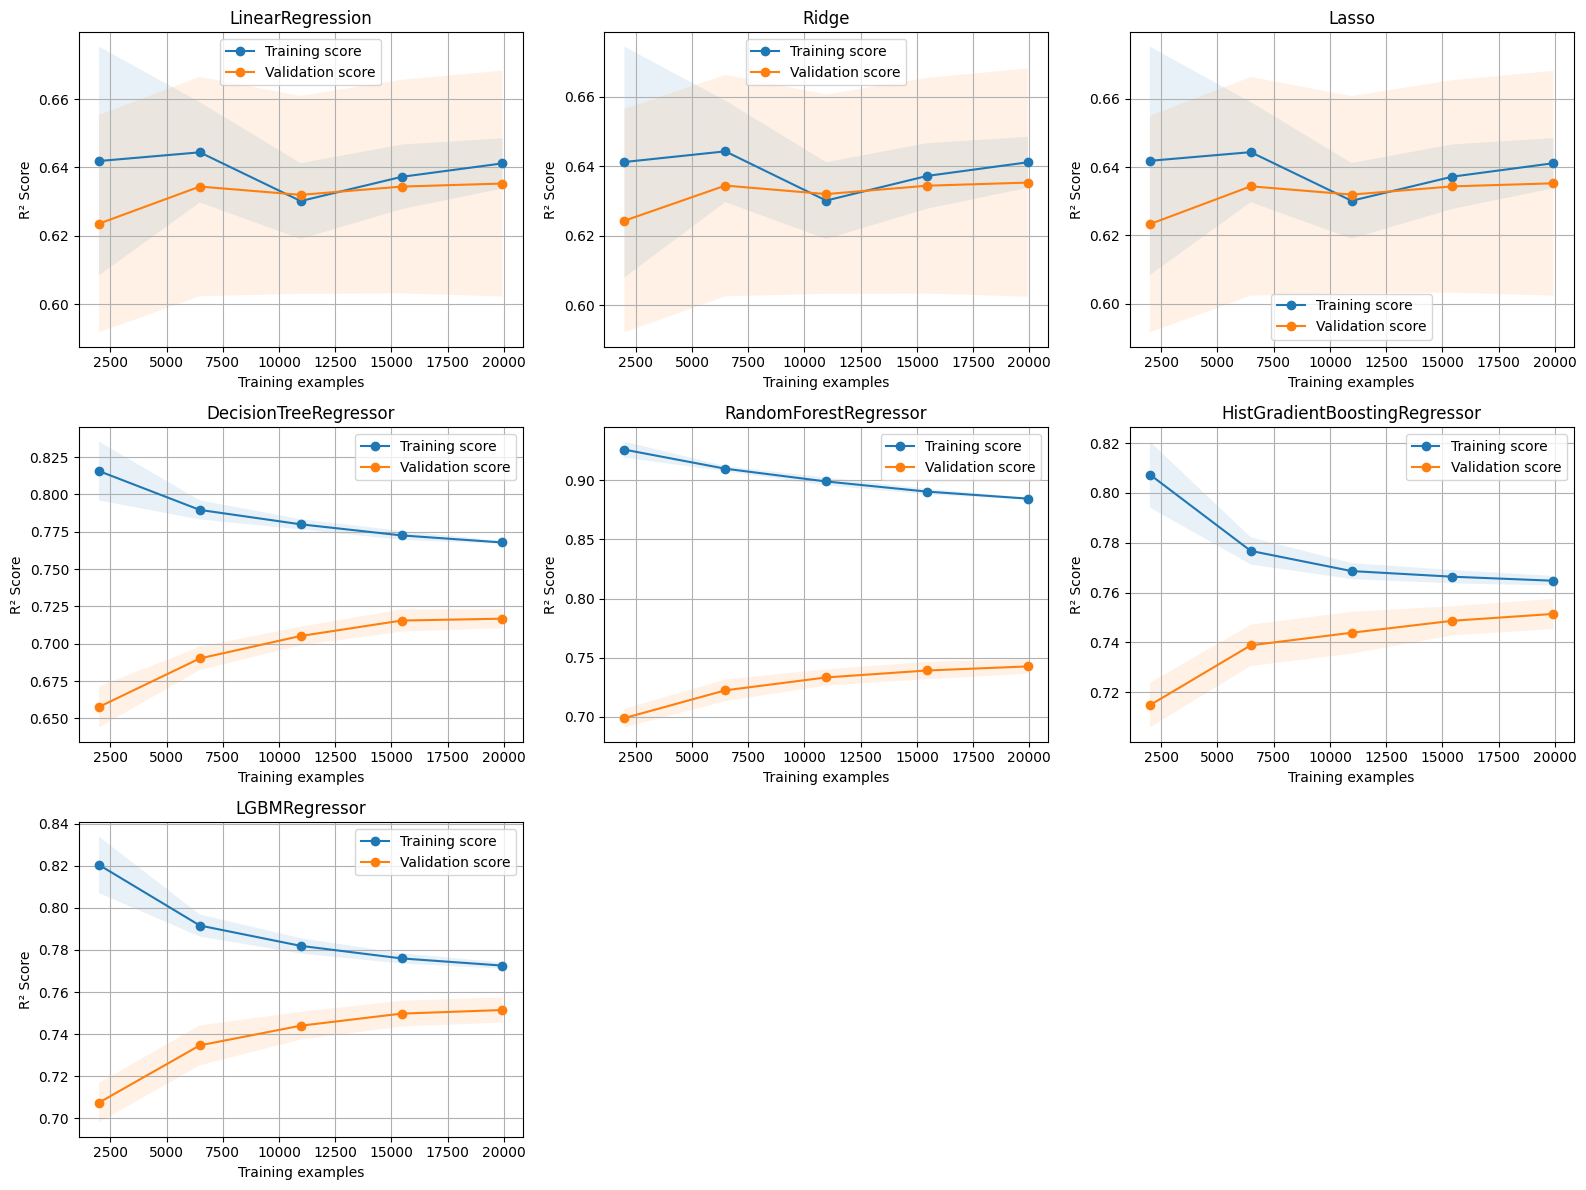

In [63]:
# 9. Learning Curves Visualization (subplot grid)
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

X_dense = X_train_processed.toarray() if hasattr(X_train_processed, 'toarray') else X_train_processed
y_dense = y_train

n_models = len(models)
n_cols = 3
n_rows = int(np.ceil(n_models / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.ravel()

for idx, (name, (model, params)) in enumerate(models.items()):
    print(f"\n📈 Plotting learning curve for {name}...")

    # Lấy best params từ dict 
    best_params = best_params_dict.get(name, {})
    best_model = model.set_params(**best_params)

    # Tính learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        best_model, X_dense, y_dense, cv=5, scoring='r2',
        n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5),
        shuffle=True, random_state=42
    )

    # Tính trung bình và độ lệch chuẩn
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Vẽ lên subplot
    ax = axes[idx]
    ax.plot(train_sizes, train_mean, 'o-', label="Training score")
    ax.plot(train_sizes, test_mean, 'o-', label="Validation score")
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    ax.set_title(name)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("R² Score")
    ax.grid(True)
    ax.legend()

for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# Predict on new example inputs


In [64]:
import pandas as pd
import numpy as np
from IPython.display import display

sample_data = [
    {'Area (m2)': 100.0, 'Rooms': 3, 'Toilets': 2, 'Transaction Type': 'Bán', 'City': 'Hồ Chí Minh', 'District': 'Quận 1', 'Direction': 'Đông', 'Legal Papers': 'Đã có sổ'},
    {'Area (m2)': 85.0,  'Rooms': 3, 'Toilets': 2, 'Transaction Type': 'Bán', 'City': 'Hồ Chí Minh', 'District': 'Quận 7', 'Direction': 'Tây',  'Legal Papers': 'Đang chờ sổ'},
    {'Area (m2)': 50.0,  'Rooms': 1, 'Toilets': 1, 'Transaction Type': 'Bán', 'City': 'Hồ Chí Minh', 'District': 'Quận 10', 'Direction': 'Nam', 'Legal Papers': 'Đã có sổ'},
]

sample_df = pd.DataFrame(sample_data)[feature_columns]

# Tiền xử lý bằng preprocessor đã fit trước đó
sample_processed = preprocessor.transform(sample_df)
sample_processed = sample_processed.toarray() if hasattr(sample_processed, 'toarray') else sample_processed

pred_results = []

for name, (model_template, _) in models.items():
    print(f"\n🔹 Running predictions with {name}...")

    params = best_params_dict.get(name, {})
    model = model_template

    # Áp dụng params tốt nhất (nếu có thể)
    if params:
        try:
            model = model.set_params(**params)
        except Exception as e:
            print(f"⚠️ Không thể set_params cho {name}: {e}")

    model.fit(X_train_dense, y_train)

    preds = model.predict(sample_processed)
    pred_results.append((name, np.round(preds, 2)))



pred_df = sample_df.copy()
for name, preds in pred_results:
    pred_df[f"{name} Predicted Price (Million VND)"] = preds

display(pred_df)



🔹 Running predictions with LinearRegression...

🔹 Running predictions with Ridge...

🔹 Running predictions with Lasso...

🔹 Running predictions with DecisionTreeRegressor...

🔹 Running predictions with RandomForestRegressor...

🔹 Running predictions with HistGradientBoostingRegressor...

🔹 Running predictions with LGBMRegressor...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 333
[LightGBM] [Info] Number of data points in the train set: 24923, number of used features: 35
[LightGBM] [Info] Start training from score 7454.286303
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

,Area (m2),Rooms,Toilets,Transaction Type,City,District,Direction,Legal Papers,LinearRegression Predicted Price (Million VND),Ridge Predicted Price (Million VND),Lasso Predicted Price (Million VND),DecisionTreeRegressor Predicted Price (Million VND),RandomForestRegressor Predicted Price (Million VND),HistGradientBoostingRegressor Predicted Price (Million VND),LGBMRegressor Predicted Price (Million VND)
0,100.00,3,2,Bán,Hồ Chí Minh,Quận 1,Đông,Đã có sổ,14161.17,14155.92,14159.61,4280.00,9345.54,15489.23,14999.77
1,85.00,3,2,Bán,Hồ Chí Minh,Quận 7,Tây,Đang chờ sổ,8467.91,8467.48,8465.83,8304.81,7941.01,8196.39,8252.24
2,50.00,1,1,Bán,Hồ Chí Minh,Quận 10,Nam,Đã có sổ,2885.91,2889.97,2956.80,4464.17,4396.70,4414.97,3803.28


In [67]:
import pandas as pd
import numpy as np
from IPython.display import display

sample_data = [
    {'Area (m2)': 60.0, 'Rooms': 3, 'Toilets': 2, 'Transaction Type': 'Bán', 'City': 'Hồ Chí Minh', 'District': 'Quận 1', 'Direction': 'Nam', 'Legal Papers': 'Đã có sổ'},
    {'Area (m2)': 60.0, 'Rooms': 2, 'Toilets': 1, 'Transaction Type': 'Bán', 'City': 'Hồ Chí Minh', 'District': 'Quận 1', 'Direction': 'Nam', 'Legal Papers': 'Chưa có giấy tờ'},
    {'Area (m2)': 60.0, 'Rooms': 2, 'Toilets': 1, 'Transaction Type': 'Bán', 'City': 'Hồ Chí Minh', 'District': 'Quận 8', 'Direction': 'Đông', 'Legal Papers': 'Chưa có giấy tờ'},
    {'Area (m2)': 85.0,  'Rooms': 3, 'Toilets': 2, 'Transaction Type': 'Bán', 'City': 'Hồ Chí Minh', 'District': 'Quận 7', 'Direction': 'Tây',  'Legal Papers': 'Chưa có giấy tờ'},

]

model_name = "LGBMRegressor"  

sample_df = pd.DataFrame(sample_data)[feature_columns]

sample_processed = preprocessor.transform(sample_df)
sample_processed = sample_processed.toarray() if hasattr(sample_processed, 'toarray') else sample_processed

model_template = models[model_name][0]
params = best_params_dict.get(model_name, {})

# clone model và gán params tốt nhất nếu có
model = model_template
if params:
    try:
        model = model.set_params(**params)
    except Exception as e:
        print(f"⚠️ Không thể set_params cho {model_name}: {e}")

print(f"🔹 Fitting {model_name} on training data (for prediction)...")
model.fit(X_train_dense, y_train)

preds = model.predict(sample_processed)

out = sample_df.copy()
out[f'{model_name} Predicted Price (Million VND)'] = np.round(preds, 2)

display(out)


🔹 Fitting LGBMRegressor on training data (for prediction)...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 333
[LightGBM] [Info] Number of data points in the train set: 24923, number of used features: 35
[LightGBM] [Info] Start training from score 7454.286303
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

,Area (m2),Rooms,Toilets,Transaction Type,City,District,Direction,Legal Papers,LGBMRegressor Predicted Price (Million VND)
0,60.00,3,2,Bán,Hồ Chí Minh,Quận 1,Nam,Đã có sổ,11046.31
1,60.00,2,1,Bán,Hồ Chí Minh,Quận 1,Nam,Chưa có giấy tờ,10779.06
2,60.00,2,1,Bán,Hồ Chí Minh,Quận 8,Đông,Chưa có giấy tờ,2560.68
3,85.00,3,2,Bán,Hồ Chí Minh,Quận 7,Tây,Chưa có giấy tờ,8300.24
